In [14]:
import pandas as pd
import glob
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Cutadapt

In [42]:
layout = pd.read_csv('maria_layout.csv').sort_values(by='SEQ_SAMPLE')
layout

,SEQ_SAMPLE,Sample_name,R1,R2,N_forward,N_reverse,DNA_seq,Prot_seq,Pos_start,Pos_stop,Species,x,Fragment,Mating_type,Replicate,Timepoint,Condition,Mutated_seq
176,Sample001,WT_N_F1_alpha_r1_T0_SC_5FC_50estra,Sample001_R1.fastq.gz,Sample001_R2.fastq.gz,TAAAAATTTCATAGCTAATG,TACATAATAATGGCACCAGT,Frag1_DNA,Frag1_prot,2,94,WT,N,F1,alpha,r1,T0,SC_5FC_50estra,WT_F1
160,Sample001,WT_N_F1_alpha_r1_T0_SC_5FC_12.5estra,Sample001_R1.fastq.gz,Sample001_R2.fastq.gz,TAAAAATTTCATAGCTAATG,TACATAATAATGGCACCAGT,Frag1_DNA,Frag1_prot,2,94,WT,N,F1,alpha,r1,T0,SC_5FC_12.5estra,WT_F1
128,Sample001,WT_N_F1_alpha_r1_T0_SC,Sample001_R1.fastq.gz,Sample001_R2.fastq.gz,TAAAAATTTCATAGCTAATG,TACATAATAATGGCACCAGT,Frag1_DNA,Frag1_prot,2,94,WT,N,F1,alpha,r1,T0,SC,WT_F1
144,Sample001,WT_N_F1_alpha_r1_T0_SC_5FC,Sample001_R1.fastq.gz,Sample001_R2.fastq.gz,TAAAAATTTCATAGCTAATG,TACATAATAATGGCACCAGT,Frag1_DNA,Frag1_prot,2,94,WT,N,F1,alpha,r1,T0,SC_5FC,WT_F1
161,Sample002,WT_N_F1_alpha_r2_T0_SC_5FC_12.5estra,Sample002_R1.fastq.gz,Sample002_R2.fastq.gz,TAAAAATTTCATAGCTAATG,TACATAATAATGGCACCAGT,Frag1_DNA,Frag1_prot,2,94,WT,N,F1,alpha,r2,T0,SC_5FC_12.5estra,WT_F1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,Sample140,WT_H_F2_a_2_T2_SC_5FC_50estra,Sample140_R1.fastq.gz,Sample140_R2.fastq.gz,CCACTCTACATGGCGAAATC,ACAGCGTGCTGCGTGCTTCA,Frag2_DNA,Frag2_prot,66,158,WT,H,F2,a,r2,T2,SC_5FC_50estra,WT_F2
124,Sample141,E64V_H_F2_a_1_T1_SC_5FC,Sample141_R1.fastq.gz,Sample141_R2.fastq.gz,CCACTCTACATGGCGAAATC,ACAGCGTGCTGCGTGCTTCA,Frag2_DNA,Frag2_prot,66,158,E64V,H,F2,a,r1,T1,SC_5FC,E64V_F2
125,Sample142,E64V_H_F2_a_2_T1_SC_5FC,Sample142_R1.fastq.gz,Sample142_R2.fastq.gz,CCACTCTACATGGCGAAATC,ACAGCGTGCTGCGTGCTTCA,Frag2_DNA,Frag2_prot,66,158,E64V,H,F2,a,r2,T1,SC_5FC,E64V_F2
126,Sample143,E64V_H_F2_a_1_T2_SC_5FC_50estra,Sample143_R1.fastq.gz,Sample143_R2.fastq.gz,CCACTCTACATGGCGAAATC,ACAGCGTGCTGCGTGCTTCA,Frag2_DNA,Frag2_prot,66,158,E64V,H,F2,a,r1,T2,SC_5FC_50estra,E64V_F2


In [43]:
rawsizes = pd.read_csv('raw_fastq_sizes.tsv', sep='\t')
rawsizetot = rawsizes.groupby('SEQ_SAMPLE').sum()
print(rawsizetot.filesize.sum())
rawsizetot

121676504293


,filesize,read
SEQ_SAMPLE,,
Sample001,842307792,R1R2
Sample002,584833110,R1R2
Sample003,730258775,R1R2
Sample004,728037977,R1R2
Sample005,817969122,R1R2
...,...,...
Sample140,467080198,R1R2
Sample141,1282659829,R1R2
Sample142,928657369,R1R2


In [44]:
merge1 = pd.merge(left=layout[['SEQ_SAMPLE','Sample_name']], right=rawsizetot, on='SEQ_SAMPLE')
merge1

,SEQ_SAMPLE,Sample_name,filesize,read
0,Sample001,WT_N_F1_alpha_r1_T0_SC_5FC_50estra,842307792,R1R2
1,Sample001,WT_N_F1_alpha_r1_T0_SC_5FC_12.5estra,842307792,R1R2
2,Sample001,WT_N_F1_alpha_r1_T0_SC,842307792,R1R2
3,Sample001,WT_N_F1_alpha_r1_T0_SC_5FC,842307792,R1R2
4,Sample002,WT_N_F1_alpha_r2_T0_SC_5FC_12.5estra,584833110,R1R2
...,...,...,...,...
187,Sample140,WT_H_F2_a_2_T2_SC_5FC_50estra,467080198,R1R2
188,Sample141,E64V_H_F2_a_1_T1_SC_5FC,1282659829,R1R2
189,Sample142,E64V_H_F2_a_2_T1_SC_5FC,928657369,R1R2
190,Sample143,E64V_H_F2_a_1_T2_SC_5FC_50estra,1238764441,R1R2


In [4]:
cutadapt = []
for f in glob.glob("benchmark_trim/*"):
    sname = f.split('/')[1].split('.benchmark.txt')[0]
    fdf = pd.read_csv(f, sep='\t')
    fdf['Sample_name'] = sname
    cutadapt.append(fdf)

trimbench = pd.concat(cutadapt, ignore_index=True)
trimbench

,s,h:m:s,max_rss,max_vms,max_uss,max_pss,io_in,io_out,mean_load,cpu_time,Sample_name
0,174.8951,0:02:54,33.53,43.16,21.26,22.82,849.76,865.33,94.14,164.83,WT_H_F1_a_1_T2_SC
1,180.2073,0:03:00,33.22,44.16,21.27,23.21,724.21,841.62,89.51,161.46,WT_H_F1_a_1_T2_SC
2,101.5298,0:01:41,32.52,42.38,25.67,25.97,0.00,381.32,71.06,72.43,WT_N_F1_alpha_r2_T0_SC_5FC_50estra
3,96.5506,0:01:36,32.41,43.38,20.50,22.47,0.00,404.07,78.95,76.44,WT_N_F1_alpha_r2_T0_SC_5FC_50estra
4,140.3227,0:02:20,32.57,43.17,20.22,22.25,739.00,664.36,96.04,135.00,WT_N_F2_alpha_1_T1_SC_5FC_12.5estra
...,...,...,...,...,...,...,...,...,...,...,...
379,175.4634,0:02:55,33.86,44.75,21.79,23.75,877.00,791.32,82.38,144.68,E64V_N_F1_alpha_2_T1_SC_5FC_50estra
380,187.8876,0:03:07,34.71,44.54,22.65,24.62,13.33,754.24,71.71,135.11,E64V_N_F2_alpha_r2_T0_SC_5FC_50estra
381,165.8167,0:02:45,34.81,45.54,22.68,24.67,0.00,701.77,74.82,124.16,E64V_N_F2_alpha_r2_T0_SC_5FC_50estra
382,107.7993,0:01:47,30.98,40.87,24.25,24.55,526.92,473.05,93.11,100.57,WT_N_F2_alpha_2_T1_SC_5FC_12.5estra


In [32]:
trimbench_mean = trimbench.groupby('Sample_name')[['s']].mean().reset_index()
trimbench_mean

,Sample_name,s
0,E64V_H_F1_a_1_T1_SC,149.73265
1,E64V_H_F1_a_1_T1_SC_5FC,170.17085
2,E64V_H_F1_a_1_T1_SC_5FC_12.5estra,158.21395
3,E64V_H_F1_a_1_T1_SC_5FC_50estra,185.41185
4,E64V_H_F1_a_1_T2_SC,175.98410
...,...,...
187,WT_N_F2_alpha_r1_T0_SC_5FC_50estra,154.47525
188,WT_N_F2_alpha_r2_T0_SC,308.17855
189,WT_N_F2_alpha_r2_T0_SC_5FC,215.65885
190,WT_N_F2_alpha_r2_T0_SC_5FC_12.5estra,268.57665


In [34]:
merge2 = merge1.merge(right=trimbench_mean, on='Sample_name')
merge2

,SEQ_SAMPLE,Sample_name,filesize,read,s
0,Sample001,WT_N_F1_alpha_r1_T0_SC_5FC_50estra,842307792,R1R2,162.94605
1,Sample001,WT_N_F1_alpha_r1_T0_SC_5FC_12.5estra,842307792,R1R2,146.77165
2,Sample001,WT_N_F1_alpha_r1_T0_SC,842307792,R1R2,158.98980
3,Sample001,WT_N_F1_alpha_r1_T0_SC_5FC,842307792,R1R2,147.44145
4,Sample002,WT_N_F1_alpha_r2_T0_SC_5FC_12.5estra,584833110,R1R2,95.65170
...,...,...,...,...,...
187,Sample140,WT_H_F2_a_2_T2_SC_5FC_50estra,467080198,R1R2,86.73505
188,Sample141,E64V_H_F2_a_1_T1_SC_5FC,1282659829,R1R2,336.15190
189,Sample142,E64V_H_F2_a_2_T1_SC_5FC,928657369,R1R2,169.19865
190,Sample143,E64V_H_F2_a_1_T2_SC_5FC_50estra,1238764441,R1R2,223.35060


<Axes: xlabel='filesize', ylabel='s'>

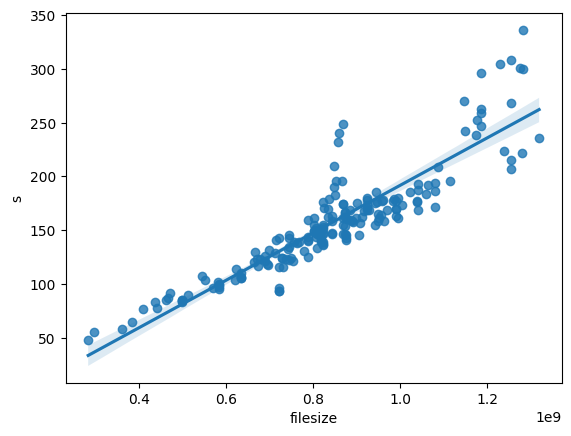

In [35]:
sns.regplot(merge2, x='filesize', y='s')
#plt.axline((0, interceptSK), slope=slopeSK, color='red', lw=2)

In [36]:
# Perform linear regression using sklearn package
X = merge2.filesize.values.reshape(-1,1)
y = merge2.s.values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=6) # train on 20% of dataset
reg = LinearRegression().fit(X_train, y_train)
    
# Extract slope and intercept from sklearn Linear Regression model
slopeSK = reg.coef_.flatten()[0]
interceptSK = reg.intercept_[0]

In [37]:
print(slopeSK*1e6, interceptSK)

0.22338944396800614 -31.62437433571182


In [38]:
merge2.to_csv('cutadapt_benchmark_time.csv')

# Pandaseq

In [47]:
trimsizes = pd.read_csv('trimmed_fastq_sizes.tsv', sep='\t')
trimsizetot = trimsizes.groupby('Sample_name').sum()
print(trimsizetot.filesize.sum())
trimsizetot

145924255497


,filesize,read
Sample_name,,
E64V_H_F1_a_1_T1_SC,735876272,R1R2
E64V_H_F1_a_1_T1_SC_5FC,754820484,R1R2
E64V_H_F1_a_1_T1_SC_5FC_12.5estra,870880847,R1R2
E64V_H_F1_a_1_T1_SC_5FC_50estra,851199530,R1R2
E64V_H_F1_a_1_T2_SC,941217786,R1R2
...,...,...
WT_N_F2_alpha_r1_T0_SC_5FC_50estra,785624863,R1R2
WT_N_F2_alpha_r2_T0_SC,1137775253,R1R2
WT_N_F2_alpha_r2_T0_SC_5FC,1137775253,R1R2


In [48]:
merge1 = pd.merge(left=layout[['SEQ_SAMPLE','Sample_name']], right=trimsizetot, on='Sample_name')
merge1

,SEQ_SAMPLE,Sample_name,filesize,read
0,Sample001,WT_N_F1_alpha_r1_T0_SC_5FC_50estra,764520447,R1R2
1,Sample001,WT_N_F1_alpha_r1_T0_SC_5FC_12.5estra,764520447,R1R2
2,Sample001,WT_N_F1_alpha_r1_T0_SC,764520447,R1R2
3,Sample001,WT_N_F1_alpha_r1_T0_SC_5FC,764520447,R1R2
4,Sample002,WT_N_F1_alpha_r2_T0_SC_5FC_12.5estra,531185600,R1R2
...,...,...,...,...
187,Sample140,WT_H_F2_a_2_T2_SC_5FC_50estra,419371008,R1R2
188,Sample141,E64V_H_F2_a_1_T1_SC_5FC,1147954464,R1R2
189,Sample142,E64V_H_F2_a_2_T1_SC_5FC,828983632,R1R2
190,Sample143,E64V_H_F2_a_1_T2_SC_5FC_50estra,1107974362,R1R2


In [49]:
pandaseq = []
for f in glob.glob("benchmark_merge/*"):
    sname = f.split('/')[1].split('.benchmark.txt')[0]
    fdf = pd.read_csv(f, sep='\t')
    fdf['Sample_name'] = sname
    pandaseq.append(fdf)

mergebench = pd.concat(pandaseq, ignore_index=True)
mergebench

,s,h:m:s,max_rss,max_vms,max_uss,max_pss,io_in,io_out,mean_load,cpu_time,Sample_name
0,88.3612,0:01:28,18.86,31.87,11.43,11.78,790.91,988.47,86.51,76.76,WT_H_F1_a_1_T2_SC
1,90.0194,0:01:30,16.74,30.23,6.69,7.77,780.41,974.96,83.83,75.58,WT_H_F1_a_1_T2_SC
2,52.7655,0:00:52,6.88,13.95,1.34,1.46,461.41,574.50,83.69,44.31,WT_N_F1_alpha_r2_T0_SC_5FC_50estra
3,58.2817,0:00:58,16.78,29.98,9.39,9.74,95.91,599.96,79.04,46.23,WT_N_F1_alpha_r2_T0_SC_5FC_50estra
4,89.1401,0:01:29,18.65,31.60,11.29,11.63,591.41,845.63,69.93,62.61,WT_N_F2_alpha_1_T1_SC_5FC_12.5estra
...,...,...,...,...,...,...,...,...,...,...,...
379,80.2868,0:01:20,6.80,13.95,1.58,1.66,809.81,973.75,94.73,76.14,E64V_N_F1_alpha_2_T1_SC_5FC_50estra
380,80.2282,0:01:20,18.52,31.60,10.14,10.98,826.91,983.94,94.51,76.15,E64V_N_F2_alpha_r2_T0_SC_5FC_50estra
381,80.7920,0:01:20,6.72,13.95,1.58,1.64,818.86,975.03,93.23,75.39,E64V_N_F2_alpha_r2_T0_SC_5FC_50estra
382,56.4833,0:00:56,19.22,31.87,8.87,10.60,410.41,598.92,78.36,44.60,WT_N_F2_alpha_2_T1_SC_5FC_12.5estra


In [50]:
mergebench_mean = mergebench.groupby('Sample_name')[['s']].mean().reset_index()
mergebench_mean

,Sample_name,s
0,E64V_H_F1_a_1_T1_SC,89.77070
1,E64V_H_F1_a_1_T1_SC_5FC,75.99110
2,E64V_H_F1_a_1_T1_SC_5FC_12.5estra,88.13510
3,E64V_H_F1_a_1_T1_SC_5FC_50estra,83.77625
4,E64V_H_F1_a_1_T2_SC,92.46035
...,...,...
187,WT_N_F2_alpha_r1_T0_SC_5FC_50estra,87.67000
188,WT_N_F2_alpha_r2_T0_SC,116.52605
189,WT_N_F2_alpha_r2_T0_SC_5FC,109.17525
190,WT_N_F2_alpha_r2_T0_SC_5FC_12.5estra,113.06270


In [51]:
merge2 = merge1.merge(right=mergebench_mean, on='Sample_name')
merge2

,SEQ_SAMPLE,Sample_name,filesize,read,s
0,Sample001,WT_N_F1_alpha_r1_T0_SC_5FC_50estra,764520447,R1R2,76.16215
1,Sample001,WT_N_F1_alpha_r1_T0_SC_5FC_12.5estra,764520447,R1R2,77.54525
2,Sample001,WT_N_F1_alpha_r1_T0_SC,764520447,R1R2,73.72815
3,Sample001,WT_N_F1_alpha_r1_T0_SC_5FC,764520447,R1R2,73.32335
4,Sample002,WT_N_F1_alpha_r2_T0_SC_5FC_12.5estra,531185600,R1R2,56.36465
...,...,...,...,...,...
187,Sample140,WT_H_F2_a_2_T2_SC_5FC_50estra,419371008,R1R2,46.12475
188,Sample141,E64V_H_F2_a_1_T1_SC_5FC,1147954464,R1R2,129.27835
189,Sample142,E64V_H_F2_a_2_T1_SC_5FC,828983632,R1R2,87.59905
190,Sample143,E64V_H_F2_a_1_T2_SC_5FC_50estra,1107974362,R1R2,116.86945


<Axes: xlabel='filesize', ylabel='s'>

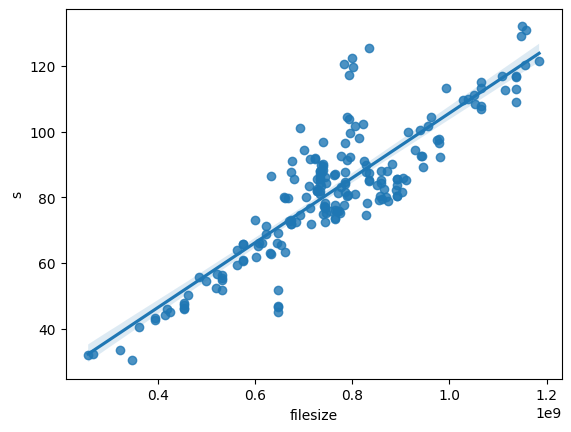

In [53]:
sns.regplot(merge2, x='filesize', y='s')

In [54]:
# Perform linear regression using sklearn package
X = merge2.filesize.values.reshape(-1,1)
y = merge2.s.values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=6) # train on 20% of dataset
reg = LinearRegression().fit(X_train, y_train)
    
# Extract slope and intercept from sklearn Linear Regression model
slopeSK = reg.coef_.flatten()[0]
interceptSK = reg.intercept_[0]

In [55]:
print(slopeSK*1e6, interceptSK)

0.10109750783784731 5.551991840274184


In [56]:
merge2.to_csv('pandaseq_benchmark_time.csv')

In [57]:
merge2[merge2.s > 118]

,SEQ_SAMPLE,Sample_name,filesize,read,s
119,Sample096,E64V_H_F2_a_2_T2_SC,783097171,R1R2,120.67075
144,Sample106,WT_H_F2_a_r2_T0_SC_5FC,834494944,R1R2,125.48645
170,Sample123,WT_H_F2_a_1_T2_SC_5FC_12.5estra,801368241,R1R2,119.71865
177,Sample130,WT_N_F2_alpha_2_T1_SC_5FC,1155831967,R1R2,120.37675
180,Sample133,E64V_N_F2_alpha_1_T1_SC_5FC,1184482596,R1R2,121.50145
182,Sample135,E64V_N_F2_alpha_1_T2_SC_5FC_50estra,1149831529,R1R2,132.21425
184,Sample137,WT_H_F2_a_1_T1_SC_5FC,798363806,R1R2,122.37700
185,Sample138,WT_H_F2_a_2_T1_SC_5FC,1157123927,R1R2,130.84870
188,Sample141,E64V_H_F2_a_1_T1_SC_5FC,1147954464,R1R2,129.27835
